# Experiment

In [ ]:
import warnings
warnings.filterwarnings("ignore")

!pip install -e git+https://github.com/datamllab/tods.git@dev#egg=tods 
exit()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import logging
import abc
import numpy as np
import pandas as pd
import torch
import random
import torch.nn as nn
from scipy.stats import multivariate_normal
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from tqdm import trange
import tqdm

from torch.autograd import Variable


import sklearn
import itertools
import operator
from lightgbm import LGBMClassifier
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
import torch
from tqdm import trange
import tqdm
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import logging


class DataProcessor:
    def __init__(self, train_link, test_link, y_var, drop_cols, scaler=None, imputer=None):
        '''
        :param train_link: link to the training data
        :param test_link: link to the test data
        :param y_var: name of the target variable
        :param drop_cols: list of columns to drop
        :param scaler: scaler to use for scaling the data
        :param imputer: imputer to use for imputing missing values
        '''
        df_normal = pd.read_csv(train_link)
        df_test = pd.read_csv(test_link)
        self.X_train, self.y_train = self.drop_y(df_normal, y_var)
        self.X_test, self.y_test = self.drop_y(df_test, y_var)
        self.X_train = self.drop_cols(self.X_train, drop_cols)
        self.X_test = self.drop_cols(self.X_test, drop_cols)
        self.col_names = self.get_colnames(self.X_train)
        self.X_train = self.check_and_impute_missing(self.X_train, imputer)
        self.X_test = self.check_and_impute_missing(self.X_test, imputer)
        self.X_train, self.X_test, self.scaler_function = self.scale_data(self.X_train, self.X_test, self.col_names,
                                                                          scaler)

    def drop_y(self, df, y_var):
        '''
        :param df: dataframe to drop the target variable from
        :param y_var: name of the target variable
        :return: dataframe with the target variable dropped
        '''
        y = df[y_var]
        x_data = df.drop(columns=[y_var], axis=1)
        return x_data, y

    def drop_cols(self, df, cols):
        '''
        :param df: dataframe to drop the columns from
        :param cols: list of columns to drop
        :return: dataframe with the columns dropped
        '''
        data = df.drop(columns=cols, axis=1)
        return data

    def get_colnames(self, df):
        '''
        :param df: dataframe to get the column names from 
        :return: list of column names
        '''
        return list(df.columns)

    def check_and_impute_missing(self, df, imputer):
        '''
        :param df: dataframe to check for missing values
        :param imputer: imputer to use for imputing missing values
        :return: dataframe with missing values imputed
        '''
        # Check for missing values
        if imputer is None:
            imputer = SimpleImputer(strategy='mean')
        missing = df.isnull().sum()
        if missing.sum() == 0:
            # No missing values, return the original dataframe
            return df
        else:
            # Impute missing values with the mean of the column
            imputed_df = imputer.fit_transform(df)
            imputed_df = pd.DataFrame(imputed_df, columns=self.col_names)
            return imputed_df

    def scale_data(self, train_df, test_df, colnames, scaler):
        '''
        :param train_df: training dataframe to scale
        :param test_df: test dataframe to scale
        :param colnames: list of column names
        :param scaler: scaler to use for scaling the data
        :return: scaled training and test dataframes
        '''
         # if no scaler is passed, use the standard scaler
        if scaler is None: 
            scaler = preprocessing.StandardScaler()
        x_scaled_train = scaler.fit_transform(train_df)
        # fit and transform the training data
        df_train = pd.DataFrame(x_scaled_train, columns=self.col_names)
        # transform the test data
        x_scaled_test = scaler.transform(test_df)
        df_test = pd.DataFrame(x_scaled_test, columns=self.col_names)
        return df_train, df_test, scaler



In [ ]:
train_link = "/content/drive/My Drive/TEPdata/experiment_1/normal_10000.csv"

test_link = "/content/drive/My Drive/TEPdata/experiment_1/df_IDV(1).csv"

In [ ]:
processor = DataProcessor(train_link, test_link, "Fault", "Unnamed: 0")
X_train = processor.X_train
y_train = processor.y_train
X_test = processor.X_test
y_test = processor.y_test
scaler = processor.scaler_function

In [ ]:

from tods.sk_interface.detection_algorithm.AutoEncoder_skinterface import AutoEncoderSKI
from tods.sk_interface.detection_algorithm.LSTMODetector_skinterface import LSTMODetectorSKI
from tods.sk_interface.detection_algorithm.OCSVM_skinterface import OCSVMSKI
from tods.sk_interface.detection_algorithm.VariationalAutoEncoder_skinterface import VariationalAutoEncoderSKI
from tods.sk_interface.detection_algorithm.AutoRegODetector_skinterface import AutoRegODetectorSKI
from tods.sk_interface.detection_algorithm.KNN_skinterface import KNNSKI
from tods.sk_interface.detection_algorithm.IsolationForest_skinterface import IsolationForestSKI

## Suggested Method

In [ ]:
class LSTMED():
    def __init__(self, num_epochs: int = 5, batch_size: int = 20, lr: float = 1e-3,
                 hidden_size: int = 5, sequence_length: int = 30, train_gaussian_percentage: float = 0.25,
                 n_layers: int = 1, use_bias: bool = True, dropout: float = 0.2):
        

        '''
        The constructor takes in a number of arguments and sets them as instance variables.
        The instance variables include hyperparameters for training an LSTM model such as the number of epochs,
        batch size, and learning rate, as well as model architecture parameters such as the hidden size,
        number of layers, and dropout rate. The class also has several instance variables for storing the
        trained model, mean, and covariance of a Gaussian distribution. The LSTMED class also has a device
        instance variable which is set to "cuda:0" if a GPU is available and "cpu" otherwise. The LSTMED
        class also has a seed instance variable which is used to set the random seeds for Python's built-in
        random module, NumPy's random module, and PyTorch's random module. This can be useful for reproducing
        results. The LSTMED class also has a details instance variable which is a boolean indicating whether
        or not to store prediction details. Finally, the LSTMED class has an instance variable called lstmed
        which will be used to store the trained LSTM model.

        :param name: name of the model
        :param num_epochs: number of epochs to train the model
        :param batch_size: batch size to use for training the model
        :param lr: learning rate to use for training the model
        :param hidden_size: number of hidden units in the LSTM model
        :param sequence_length: number of time steps in the LSTM model
        :param train_gaussian_percentage: percentage of training data to use for training the Gaussian distribution
        :param n_layers: number of layers in the LSTM model
        :param use_bias: whether or not to use bias in the LSTM model
        :param dropout: dropout rate in the LSTM model
        :param seed: random seed to use for reproducibility
        :param gpu: GPU to use for training the model
        :param details: whether or not to store prediction details
        '''

        # set the random seed
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.prediction_details = {}
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.lr = lr
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length
        self.train_gaussian_percentage = train_gaussian_percentage
        self.n_layers = n_layers
        self.use_bias = use_bias
        self.dropout = dropout

        # will be used to store the trained LSTM model
        self.lstmed = None
        # will be used to store the mean and covariance of the Gaussian distribution
        self.mean, self.cov = None, None

    def to_device(self, model):
        '''
        Move the model to the device specified by the user
        :param model: model to move to the device
        '''
        model.to(self.device)

    def fit(self, X: pd.DataFrame):
        '''
        Define's a method fit the model, takes as input a pandas DataFrame X.
        The method begins by converting X to a NumPy array and then creating a list of sub-arrays,
        each of which is a sequence of self.sequence_length consecutive rows of data.
        These sequences are then randomly shuffled and split into two subsets, a training set and a
        "train Gaussian" set. The training set is used to train an LSTM-based module called self.lstmed
        using an Adam optimizer, while the "train Gaussian" set is used to evaluate the model.
        Finally, the mean and covariance of the error between the model's predictions and the actual
        values are computed for the "train Gaussian" set and stored as attributes self.mean and self.cov,
        respectively.

        :param X: pandas DataFrame to fit the model
        :return: None
        '''
        data = X.values
        # create sequences of data by taking self.sequence_length consecutive rows
        sequences = [data[i:i + self.sequence_length] for i in range(data.shape[0] - self.sequence_length + 1)]
        # shuffle the sequences
        indices = np.random.permutation(len(sequences))
        # split the sequences into a training set and a "train Gaussian" set
        split_point = int(self.train_gaussian_percentage * len(sequences))
        # training set
        train_loader = DataLoader(dataset=sequences, batch_size=self.batch_size, drop_last=True,
                                  sampler=SubsetRandomSampler(indices[:-split_point]), pin_memory=True)
        train_gaussian_loader = DataLoader(dataset=sequences, batch_size=self.batch_size, drop_last=True,
                                           sampler=SubsetRandomSampler(indices[-split_point:]), pin_memory=True)

        # create the LSTM model using the LSTMEDModule class
        self.lstmed = LSTMEDModule(X.shape[1], self.hidden_size,
                                   self.n_layers, self.use_bias, self.dropout)
        # move the model to the device specified by the user
        self.to_device(self.lstmed)
        # create an Adam optimizer
        optimizer = torch.optim.Adam(self.lstmed.parameters(), lr=self.lr)
        # set the model to training mode
        # In PyTorch, the training mode of a model refers to whether the model's parameters are being updated
        # during the forward pass or not. When a model is in training mode, its parameters are being updated
        # based on the gradients computed during the backward pass. When a model is in evaluation mode,
        # its parameters are not updated and certain layers (e.g. dropout layers) may behave differently.
        self.lstmed.train()
        # trange is a wrapper around the range function to provide a smart progress meter
        # when looping over an iterable. It can also be used as a context manager
        for epoch in trange(self.num_epochs):
            # log the epoch number
            logging.debug(f'Epoch {epoch + 1}/{self.num_epochs}.')
            # iterate over the training set
            for ts_batch in train_loader:
                # move the batch to the device specified by the user
                output = self.lstmed(self.to_var(ts_batch))
                # compute the loss between the model's predictions and the actual values using the MSE loss function
                loss = nn.MSELoss(size_average=False)(output, self.to_var(ts_batch.float()))
                # clear the gradients
                self.lstmed.zero_grad()
                # compute the gradients
                loss.backward()
                # update the model's parameters
                optimizer.step()
        # set the model to evaluation mode
        # In PyTorch, the evaluation mode of a model refers to a setting in which the model's parameters
        # are not being updated during the forward pass. In other words, when a model is in evaluation mode,
        # the gradients are not computed during the backward pass and the model's parameters are not updated.
        self.lstmed.eval()
        error_vectors = []
        # iterate over the "train Gaussian" set
        for ts_batch in train_gaussian_loader:
            # forward pass
            output = self.lstmed(self.to_var(ts_batch))
            # compute the error between the model's predictions and the actual values
            error = nn.L1Loss(reduce=False)(output, self.to_var(ts_batch.float()))
            # store the error vectors
            error_vectors += list(error.view(-1, X.shape[1]).data.cpu().numpy())
        # compute the mean and covariance of the error vectors
        self.mean = np.mean(error_vectors, axis=0)
        self.cov = np.cov(error_vectors, rowvar=False)
    
    def to_var(self, t, **kwargs):
        '''
        The to_var function converts a tensor to a variable.
        The purpose of this function is to convert the input tensor to a PyTorch Variable,
        which is a wrapper around a tensor that allows the tensor to be used as an input to a computation
        and to store the gradient of the computation with respect to the tensor.

        :param t: tensor to convert
        :param kwargs: keyword arguments
        :return: variable
        '''
        # send the tensor to the device
        t = t.to(self.device)
        # convert the tensor to a variable
        return Variable(t, **kwargs)

    def predict(self, X: pd.DataFrame):
        '''
        A multivariate normal distribution is created using the mean and covariance attributes self.mean and self.cov, respectively.
        The model is then applied to each batch of sequences in the data loader, and the error between the model's
        output and the actual sequences is computed. The negative log probability of the error under the
        multivariate normal distribution is also computed and added to a list of scores. If the self.details
        attribute is True, the model's output and the error are also appended to lists.
        Finally, the scores are averaged over each self.sequence_length consecutive entries and returned,
        along with the self.prediction_details dictionary if self.details is True. The self.prediction_details
        dictionary is updated with the mean of the model's output and the mean of the errors, both averaged over
        each self.sequence_length consecutive entries.

        :param X: pandas DataFrame to predict
        :return: numpy array of scores and dictionary of prediction details
        '''
        data = X.values
        sequences = [data[i:i + self.sequence_length] for i in range(data.shape[0] - self.sequence_length + 1)]
        data_loader = DataLoader(dataset=sequences, batch_size=self.batch_size, shuffle=False, drop_last=False)
        # set the model to evaluation mode
        self.lstmed.eval()
        # create a multivariate normal distribution
        mvnormal = multivariate_normal(self.mean, self.cov, allow_singular=True)
        scores = []
        outputs = []
        errors = []
        # iterate over the data loader
        for idx, ts in enumerate(data_loader):
            # forward pass
            output = self.lstmed(self.to_var(ts))
            # compute the error between the model's predictions and the actual values using the L1 loss function
            # The error is calculated using the L1 loss function because it is a commonly used measure of
            # absolute error between two tensors. The L1 loss function is defined as the sum of the absolute
            # differences between the elements of the two tensors. It is often used because it is more robust
            # to outliers than the mean squared error (MSE) loss, which is another commonly used loss function.
            error = nn.L1Loss(reduce=False)(output, self.to_var(ts.float()))
            # compute the negative log probability of the error under the multivariate normal distribution
            # The scores are calculated using the negative log probability of the error under a multivariate
            # normal distribution because the model is assumed to have a Gaussian distribution of errors.
            # The negative log probability is used as a measure of the likelihood of the error under the
            # assumed distribution. This likelihood can then be used to determine whether a particular sample
            # is an outlier or not, as samples with low likelihood are less likely to have been generated by
            # the model and are more likely to be anomalies.
            score = -mvnormal.logpdf(error.view(-1, X.shape[1]).data.cpu().numpy())
            scores.append(score.reshape(ts.size(0), self.sequence_length))
            outputs.append(output.cpu().data.numpy())
            errors.append(error.cpu().data.numpy())

        # concatenate the scores
        scores = np.concatenate(scores)
        # create a matrix of NaNs with the same shape as the data
        scores_matrix = np.full((self.sequence_length, data.shape[0]), np.nan)
        # iterate over the scores
        for i, score in enumerate(scores):
            # fill the matrix with the scores
            scores_matrix[i % self.sequence_length, i:i + self.sequence_length] = score
        # average the scores over each self.sequence_length consecutive entries
        scores = np.nanmean(scores_matrix, axis=0)

    
        # concatenate the outputs
        outputs = np.concatenate(outputs)
        # create a matrix of NaNs with the same shape as the data
        scores_matrix = np.full((self.sequence_length, X.shape[0], X.shape[1]), np.nan)
        # iterate over the outputs
        for i, output in enumerate(outputs):
            # fill the matrix with the outputs
            scores_matrix[i % self.sequence_length, i:i + self.sequence_length, :] = output
        # average the outputs over each self.sequence_length consecutive entries
        self.prediction_details.update({'reconstructions_mean': np.nanmean(scores_matrix, axis=0).T})
        # concatenate the errors
        errors = np.concatenate(errors)
        # create a matrix of NaNs with the same shape as the data
        scores_matrix = np.full((self.sequence_length, X.shape[0], X.shape[1]), np.nan)
        # iterate over the errors
        for i, error in enumerate(errors):
            # fill the matrix with the errors
            scores_matrix[i % self.sequence_length, i:i + self.sequence_length, :] = error
        # average the errors over each self.sequence_length consecutive entries
        self.prediction_details.update({'errors_mean': np.nanmean(scores_matrix, axis=0).T})
        # return the scores and the prediction details
        return scores, self.prediction_details


class LSTMEDModule(nn.Module):
    def __init__(self, n_features: int, hidden_size: int,
                 n_layers: int, use_bias: bool, dropout: float):
        '''
        The LSTMEDModule class is a PyTorch module that contains the LSTMED model.
        The LSTM model has three main components: an encoder, a decoder, and a linear layer.
        The encoder and decoder are both LSTM layers, while the linear layer maps the hidden state of the LSTM
        to the output.
        :param n_features: number of features in the input
        :param hidden_size: number of hidden units in the LSTM
        :param n_layers: is a tuple specifying the number of layers in the encoder and decoder,
        :param use_bias: is a tuple specifying whether to use a bias term in the encoder and decoder,
        :param dropout: is a tuple specifying the dropout probability in the encoder and decoder,
        :param seed: seed for the random number generator
        :param gpu: GPU to use
        '''
        super().__init__()
        # set the device
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.n_features = n_features
        self.hidden_size = hidden_size

        self.n_layers = n_layers
        self.use_bias = use_bias
        self.dropout = dropout
        # encoder
        self.encoder = nn.LSTM(self.n_features, self.hidden_size, batch_first=True,
                               num_layers=self.n_layers, bias=self.use_bias, dropout=self.dropout)
        # send the encoder to the device
        self.to_device(self.encoder)
        # decoder
        self.decoder = nn.LSTM(self.n_features, self.hidden_size, batch_first=True,
                               num_layers=self.n_layers, bias=self.use_bias, dropout=self.dropout)
        # send the decoder to the device
        self.to_device(self.decoder)
        # linear layer
        self.hidden2output = nn.Linear(self.hidden_size, self.n_features)
        # send the linear layer to the device
        self.to_device(self.hidden2output)

    def to_device(self, model):
        '''
        Move the model to the device specified by the user
        :param model: model to move to the device
        '''
        model.to(self.device)

 

    def to_var(self, t, **kwargs):
        '''
        The to_var function converts a tensor to a variable.
        The purpose of this function is to convert the input tensor to a PyTorch Variable,
        which is a wrapper around a tensor that allows the tensor to be used as an input to a computation
        and to store the gradient of the computation with respect to the tensor.

        :param t: tensor to convert
        :param kwargs: keyword arguments
        :return: variable
        '''
        # send the tensor to the device
        t = t.to(self.device)
        # convert the tensor to a variable
        return Variable(t, **kwargs)

    def _init_hidden(self, batch_size):
        '''
        The _init_hidden function first creates two tensors of zeros with the appropriate dimensions
        using the torch.Tensor.zero_ method. These tensors are then converted to Variables using the to_var
        method, which moves them to the specified device (CPU or GPU) and wraps them in Variable objects.
        Finally, the function returns a tuple containing the two Variables representing the initial hidden
        state for the encoder and decoder.

        The hidden state of an LSTM is a memory cell that stores information from the past and is used to make
        predictions based on this information. At the beginning of the model's execution, the hidden state should
        be initialized to a tensor of zeros so that it does not contain any information from previous computations.

        By initializing the hidden state to a tensor of zeros, we ensure that the model starts with a blank slate
        and that its predictions are based solely on the current input data, rather than on any information from
        previous computations. The _init_hidden function is used to create the initial hidden state for the
        encoder and decoder of the LSTM model, and this initial hidden state is passed as an argument to the
        forward method when it is called.

        :param batch_size: batch size
        :return: tuple containing the initial hidden state for the encoder and decoder
        '''
        return (self.to_var(torch.Tensor(self.n_layers, batch_size, self.hidden_size).zero_()),
                self.to_var(torch.Tensor(self.n_layers, batch_size, self.hidden_size).zero_()))

    def forward(self, ts_batch):
        '''
        The first step in the forward pass is to initialize the hidden state of the encoder using the
        _init_hidden method. The encoder is then applied to the input time series data ts_batch, and the
        output and final hidden state are returned. The final hidden state of the encoder is then used to
        initialize the hidden state of the decoder.

        Next, the output tensor is initialized to a tensor of zeros with the same size as ts_batch. This tensor
        will be used to store the output of the model. The model then iterates over the time steps of ts_batch
        in reverse order, starting from the final time step. At each time step, the hidden2output linear layer
        is applied to the current hidden state of the decoder to produce the output for that time step, which
        is stored in the output tensor.

        If the model is in training mode, the decoder is applied to the input time series data at the current
        time step. If the model is in evaluation mode, the decoder is applied to the output produced by the
        model at the current time step. In either case, the output and final hidden state of the decoder are
        returned and the hidden state of the decoder is updated.

        Why the sequences are processed in reverse order:
            1. Processing the time steps in reverse order allows the model to make predictions for future time steps
               based on the input data up to the current time step. This is because the hidden state of the LSTM,
               which stores information from the past, is updated at each time step based on the input data and the
               previous hidden state. By starting at the final time step and working backwards, the hidden state
               will contain information about all of the input data up to the current time step, which can be used
               to make predictions for future time steps.
            2. Processing the time steps in reverse order allows the model to take advantage of the temporal
               dependencies in the data. LSTM models are able to capture long-term dependencies in time series data,
               and processing the time steps in reverse order may allow the model to more easily capture these
               dependencies.

        :param ts_batch: batch of time series data
        :param return_latent: whether to return the latent representation
        :return: output of the model
        '''
        # get the batch size
        batch_size = ts_batch.shape[0]
        # initialize the hidden state of the encoder
        enc_hidden = self._init_hidden(batch_size)
        # apply the encoder to the input time series data
        _, enc_hidden = self.encoder(ts_batch.float(), enc_hidden)
        # initialize the hidden state of the decoder
        dec_hidden = enc_hidden
        # initialize the output tensor
        output = self.to_var(torch.Tensor(ts_batch.size()).zero_())
        # This means that the model starts at the final time step of the input data and works its way
        # backwards to the initial time step.

        # iterate over the time steps of the input time series data
        for i in reversed(range(ts_batch.shape[1])):
            # apply the linear layer to the current hidden state of the decoder
            output[:, i, :] = self.hidden2output(dec_hidden[0][0, :])
            if self.training:
                # apply the decoder to the input time series data at the current time step
                _, dec_hidden = self.decoder(ts_batch[:, i].unsqueeze(1).float(), dec_hidden)
            else:
                # apply the decoder to the output produced by the model at the current time step
                _, dec_hidden = self.decoder(output[:, i].unsqueeze(1), dec_hidden)

        # return the output of the model
        return output

In [ ]:
model = LSTMED()
model.fit(X_train)

100%|██████████| 5/5 [00:41<00:00,  8.30s/it]


# Bayesian Optimising

In [ ]:
pip install ax-platform

In [ ]:
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render
from ax.utils.tutorials.cnn_utils import train, evaluate

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

def train_evaluate(parameterization):

    # constructing a new training data loader allows us to tune the batch size
    train_loader = torch.utils.data.DataLoader(trainset,
                                batch_size=parameterization.get("batchsize", 32),
                                shuffle=True,
                                num_workers=0,
                                pin_memory=True)
    
    # Get neural net
    untrained_net = init_net(parameterization) 
    
    # train
    trained_net = net_train(net=untrained_net, train_loader=train_loader, 
                            parameters=parameterization, dtype=dtype, device=device)
    
    # return the accuracy of the model as it was trained in this run
    return evaluate(
        net=trained_net,
        data_loader=testloader,
        dtype=dtype,
        device=device,
    )

In [ ]:

torch.cuda.set_device(0) #this is sometimes necessary for me
dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

best_parameters, values, experiment, model = optimize(
    parameters=[
        {"name": "lr", "type": "range", "bounds": [1e-6, 0.4], "log_scale": True},
        {"name": "batchsize", "type": "range", "bounds": [16, 128]},
        #{"name": "max_epoch", "type": "range", "bounds": [1, 30]},
        #{"name": "stepsize", "type": "range", "bounds": [20, 40]},        
    ],
  
    evaluation_function=predict,
    objective_name='accuracy',
)

print(best_parameters)
means, covariances = values
print(means)
print(covariances)

NameError: ignored

## Experiment Pipeline

In [ ]:

methods = {"Isolation Forest": IsolationForestSKI,
           "Autoencoder":AutoEncoderSKI,
           "LSTM": LSTMODetectorSKI,
           "OCSVM": OCSVMSKI, 
           "Variational AutoEncoder": VariationalAutoEncoderSKI,
           "AutoRegressive" : AutoRegODetectorSKI,
           "KNN": KNNSKI }



def _precision(tp,fp):
    pre = tp / float(tp + fp)
    return pre 

def _recall(tp,fn):
    rec= tp / float(tp + fn)
    return rec 

def _f1(pre,rec):
    '''
    F1 = 2 * (precision * recall) / (precision + recall)
    '''
    f1 = 2 * (pre * rec) / (pre + rec)
    return f1

def print_results(accuracy, pre, rec, f1,roc):
    print("Accuracy: {}%".format(round(accuracy*100,2)))
    print("Precision: {}%".format(round(pre*100,2)))
    print("Recall: {}%".format(round(rec*100,2)))
    print("F1 Score: {}%".format(round(f1*100,2)))
    print("ROCAUC: {}%".format(round(roc*100,2)))
    
def calculate_results_print(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = accuracy_score(y_test, y_pred)
    precision = _precision(TP,FP)
    recall = _recall(TP,FN)
    f1 = _f1(precision,recall)
    roc = roc_auc_score(y_test, y_pred)
    print_results(accuracy, precision, recall, f1,roc)

def train_models(x_train, methods):
    trained = {}
    for method in methods:
        transformer_IF = methods[method](contamination=0.1)
        transformer_IF.fit(X_train.values)
        trained[method] = transformer_IF

    return trained


def experiment_run_models(x_test, methods):
    results = {}
    for method in methods:

        prediction_labels_IF = methods[method].predict(x_test.values)
        prediction_score_IF = methods[method].predict_score(x_test.values)
        y_pred = prediction_labels_IF
        results[method] = y_pred
    return results


def experiment_print(y_test, results,desc):
    print(desc)
    for res in results:
        print(res)
        calculate_results_print(y_test, results[res])
        print('\n')

def _results(accuracy, pre, rec, f1,roc):
    acc = round(accuracy*100,2)
    precision = round(pre*100,2)
    recall = round(rec*100,2)
    f1_score = round(f1*100,2)
    roc_auc = round(roc*100,2)
    return [acc,precision, recall, f1_score, roc_auc]
    
def calculate_results_return(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = accuracy_score(y_test, y_pred)
    precision = _precision(TP,FP)
    recall = _recall(TP,FN)
    f1 = _f1(precision,recall)
    roc = roc_auc_score(y_test, y_pred)
    acc,precision, recall, f1_score, roc_auc = _results(accuracy, precision, recall , f1, roc)
    return [acc,precision, recall, f1_score, roc_auc]

def result_dataframe(trainer_experiment, y_test,fault,prop_pred):
    df = pd.DataFrame()
    trainer_experiment["Proposed Model"] = prop_pred
    for model in trainer_experiment:
        res = calculate_results_return(y_test,  trainer_experiment[model])
        df = df.append({"Fault": fault,'Model' : model, 'Accuracy': res[0], 'Precision': res[1], 'Recall': res[2], 'F1 Score': res[3], 'ROCAUC': res[4]}, ignore_index=True)
    return df 

# Defining custom function which returns
# the list for df.style.apply() method
def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]
def find_optimal_threshold(y_test, y_pred):
        '''
        :param y_test: test target variable
        :param y_pred: predicted target variable
        :return: optimal threshold
        '''
        # get the false positive rate, true positive rate and thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        # get the optimal threshold based on the maximum tpr - fpr
        optimal_idx = np.argmax(tpr - fpr)
        # get the optimal threshold
        optimal_threshold = thresholds[optimal_idx]
        return optimal_threshold

def convert_scores_to_label(array, threshold):
    '''
    The function converts the scores to labels based on the threshold, if the score is greater than the threshold,
    the label is 1, else 0
    :param array: array of scores
    :param threshold: threshold to use for converting the scores to labels
    :return: array of labels
    '''
    binary = []
    for i in array:
        if i < threshold:
            binary.append(0)
        else:
            binary.append(1)
    return binary




def run_experiment(models, x_test, y_test,fault, prop_pred):
    experiment_preds = experiment_run_models(x_test, models)
    for i in experiment_preds:
        if i != "Proposed Model":
            experiment_preds[i] =  experiment_preds[i].ravel().tolist()
    answer = result_dataframe(experiment_preds, y_test, fault,prop_pred)
    #answer = answer.style.apply(highlight_max)
    return answer ,experiment_preds 

In [ ]:
models = train_models(X_train, methods)

In [ ]:
def fault_name(link):
    parts = link.split('/')
    filename = parts[-1]  # get the last part of the split string, which is the file name
    idv = filename.split('_')[-1].split('.')[0] # get the last part before the '.'
    return idv 

# Defining custom function which returns
# the list for df.style.apply() method
def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]


def runit(link_test):
    fname = fault_name(link_test)
    processor = DataProcessor(train_link, link_test, "Fault", "Unnamed: 0")
    X_train = processor.X_train
    y_train = processor.y_train
    x_test = processor.X_test
    y_test = processor.y_test
    y_pred, details_test = model.predict(x_test)
    optimal_threshold = find_optimal_threshold(y_test, y_pred) 
    y_predictions = convert_scores_to_label(y_pred, optimal_threshold)
    experiment,exp_preds = run_experiment(models, x_test, y_test,fname,y_predictions)
    return experiment, exp_preds



In [ ]:


def runit_lstm(link_test):
    fname = fault_name(link_test)
    processor = DataProcessor(train_link, link_test, "Fault", "Unnamed: 0")
    X_train = processor.X_train
    y_train = processor.y_train
    x_test = processor.X_test
    y_test = processor.y_test
    y_pred, details_test = model.predict(x_test)
    optimal_threshold = find_optimal_threshold(y_test, y_pred) 
    y_predictions = convert_scores_to_label(y_pred, optimal_threshold)
    answer = result_dataframe({}, y_test, fname,y_predictions)
    return answer



In [ ]:
idv1 ,idv1_preds= runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(4).csv")


In [ ]:
def convert_dict_to_df(dictionary,y_true, fault):
    dictionary["y_true"] = y_true
    df=pd.DataFrame.from_dict(dictionary,orient='index').transpose()
    df["Fault"] = fault
    return df

In [ ]:
idv1, idv1_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(1).csv")
idv2, idv2_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(2).csv")

In [ ]:
idv1, idv1_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(1).csv")
idv2, idv2_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(2).csv")
idv3, idv3_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(3).csv")
idv4, idv4_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(4).csv")
idv5, idv5_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(5).csv")
idv6, idv6_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(6).csv")
idv7, idv7_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(7).csv")
idv8, idv8_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(8).csv")
idv9, idv9_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(9).csv")
idv10,idv10_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(10).csv")
idv11,idv11_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(11).csv")
idv12,idv12_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(12).csv")
idv13,idv13_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(13).csv")
idv14,idv14_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(14).csv")
idv15,idv15_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(15).csv")
idv16,idv16_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(16).csv")
idv17,idv17_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(17).csv")
idv18,idv18_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(18).csv")
idv19,idv19_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(19).csv")
idv20,idv20_preds = runit("/content/drive/My Drive/TEPdata/experiment_1/df_IDV(20).csv")

In [ ]:
idv1_preds = convert_dict_to_df(idv1_preds, y_test, "IDV(1)")
idv2_preds = convert_dict_to_df(idv2_preds, y_test, "IDV(2)")
idv3_preds = convert_dict_to_df(idv3_preds, y_test, "IDV(3)")
idv4_preds = convert_dict_to_df(idv4_preds, y_test, "IDV(4)")
idv5_preds = convert_dict_to_df(idv5_preds, y_test, "IDV(5)")
idv6_preds = convert_dict_to_df(idv6_preds, y_test, "IDV(6)")
idv7_preds = convert_dict_to_df(idv7_preds, y_test, "IDV(7)")
idv8_preds = convert_dict_to_df(idv8_preds, y_test, "IDV(8)")
idv9_preds = convert_dict_to_df(idv9_preds, y_test, "IDV(9)")
idv10_preds = convert_dict_to_df(idv10_preds, y_test, "IDV(10)")
idv11_preds = convert_dict_to_df(idv11_preds, y_test, "IDV(11)")
idv12_preds = convert_dict_to_df(idv12_preds, y_test, "IDV(12)")
idv13_preds = convert_dict_to_df(idv13_preds, y_test, "IDV(13)")
idv14_preds = convert_dict_to_df(idv14_preds, y_test, "IDV(14)")
idv15_preds = convert_dict_to_df(idv15_preds, y_test, "IDV(15)")
idv16_preds = convert_dict_to_df(idv16_preds, y_test, "IDV(16)")
idv17_preds = convert_dict_to_df(idv17_preds, y_test, "IDV(17)")
idv18_preds = convert_dict_to_df(idv18_preds, y_test, "IDV(18)")
idv19_preds = convert_dict_to_df(idv19_preds, y_test, "IDV(19)")
idv20_preds = convert_dict_to_df(idv20_preds, y_test, "IDV(20)")


In [ ]:
check

,Isolation Forest,Autoencoder,LSTM,OCSVM,Variational AutoEncoder,AutoRegressive,KNN,Proposed Model,y_true,Fault
0,0,0,0,0,0,0,0,0,0,IDV(1)
1,0,0,0,0,0,0,0,0,0,IDV(1)
2,0,0,1,0,0,0,0,0,0,IDV(1)
3,0,0,1,0,0,0,0,0,0,IDV(1)
4,0,0,1,0,0,0,0,0,0,IDV(1)
...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,IDV(2)
19996,0,0,0,0,0,0,0,0,0,IDV(2)
19997,0,0,0,0,0,0,0,0,0,IDV(2)
19998,0,0,0,0,0,0,0,0,0,IDV(2)


In [ ]:
def join_df(df_list):
    df = pd.concat(df_list, ignore_index=True)
    return df


In [ ]:
results_all_cm = join_df([idv1_preds,idv2_preds,idv3_preds,idv4_preds,idv5_preds,
                          idv6_preds,idv7_preds,idv8_preds,idv9_preds,idv10_preds,
                          idv11_preds,idv12_preds,idv13_preds,idv14_preds,idv15_preds,
                          idv16_preds,idv17_preds,idv18_preds,idv19_preds,idv20_preds])

results_good_cm = join_df([idv1_preds,idv2_preds,idv4_preds,idv5_preds,
                          idv6_preds,idv8_preds,idv10_preds,
                          idv11_preds,idv13_preds,idv14_preds,
                          idv16_preds,idv17_preds,idv19_preds,idv20_preds])

In [ ]:
    
result_all = join_df([idv1, idv2, idv3, idv4, idv5,
                      idv6, idv7, idv8, idv9, idv10, 
                      idv11, idv12, idv13, idv14,idv15, 
                      idv16, idv17, idv18, idv19, idv20])

result_good = join_df([idv1, idv2, idv4, idv5,
                      idv6, idv8, idv10, 
                      idv11, idv13, idv14, 
                      idv16, idv17, idv19, idv20])

In [ ]:
results_all_cm.to_csv("experiment_results_all_cm.csv")
results_good_cm.to_csv("experiment_results_good_cm.csv")

In [ ]:
def result_table(df):
    res = df.groupby(['Model'])
    return res.mean() 
    
res = result_table(result_good)
res

What do i need?

- Need a dataframe with the predictions for each of the modules for each dataset, thus will need a dataframe with cols "Fault", "y_true" and a column for each model where we have the y_pred for that model

# Prediction Dataframe for Confusion Matrix

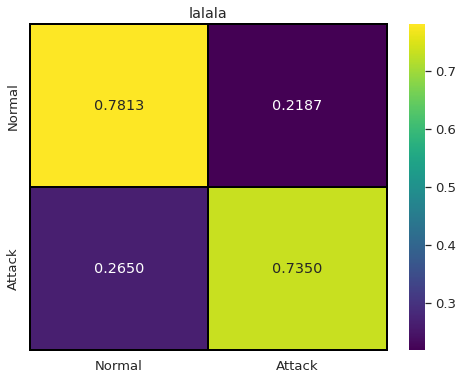

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def make_confusion_matrix(y_true, y_prediction, normalise = False, c_map = "viridis"):
    sns.set(font_scale=1.2)
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    ax.set_title('lalala')
    cm = confusion_matrix(y_true, y_prediction)
    format = "d"
    if normalise== True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        format = '.4f'
    cm_matrix = pd.DataFrame(data=cm, columns=['Normal', 'Attack'], 
                                index=['Normal', 'Attack'])

    sns.heatmap(cm_matrix, annot=True, fmt=format, cmap=c_map,linewidths=1, linecolor='black',clip_on=False)
    plt.show()

make_confusion_matrix(results_good_cm["y_true"],results_good_cm["KNN"], True)



In [ ]:
results_all_cm

,Isolation Forest,Autoencoder,LSTM,OCSVM,Variational AutoEncoder,AutoRegressive,KNN,Proposed Model,y_true,Fault
0,0,0,0,0,0,0,0,0,0,IDV(1)
1,0,0,0,0,0,0,0,0,0,IDV(1)
2,0,0,0,0,0,0,0,0,0,IDV(1)
3,0,0,0,0,0,0,0,0,0,IDV(1)
4,0,0,0,0,0,0,0,0,0,IDV(1)
...,...,...,...,...,...,...,...,...,...,...
199995,0,0,1,0,0,0,0,0,0,IDV(20)
199996,0,0,1,0,0,1,0,0,0,IDV(20)
199997,0,0,1,0,0,0,0,0,0,IDV(20)
199998,0,0,1,0,0,0,0,0,0,IDV(20)


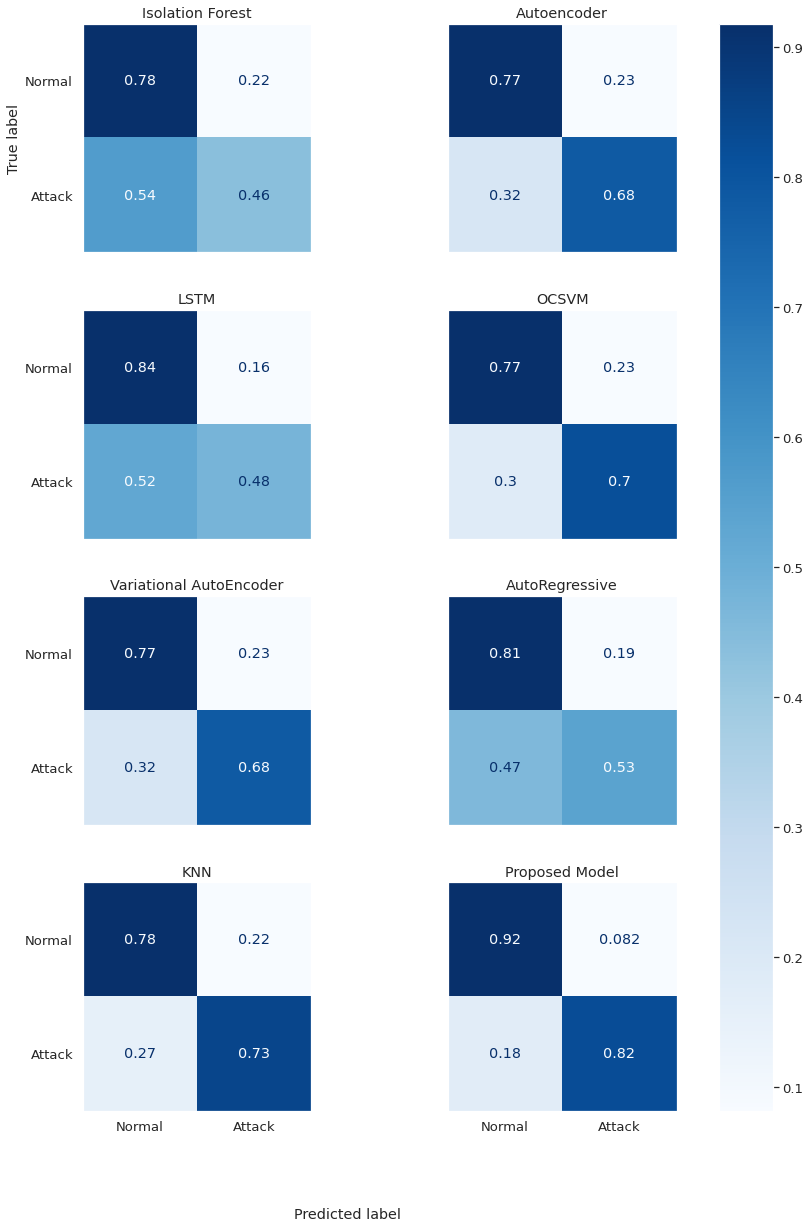

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
df = results_good_cm
methods = {"Isolation Forest": IsolationForestSKI,
           "Autoencoder":AutoEncoderSKI,
           "LSTM": LSTMODetectorSKI,
           "OCSVM": OCSVMSKI, 
           "Variational AutoEncoder": VariationalAutoEncoderSKI,
           "AutoRegressive" : AutoRegODetectorSKI,
           "KNN": KNNSKI,
           "Proposed Model": LSTMED}

predictions = {"Isolation Forest": df['Isolation Forest'],
           "Autoencoder":df['Autoencoder'],
           "LSTM": df["LSTM"],
           "OCSVM": df[ "OCSVM"], 
           "Variational AutoEncoder": df["Variational AutoEncoder"],
           "AutoRegressive" : df["AutoRegressive"],
           "KNN": df["KNN"],
           "Proposed Model": df["Proposed Model"] }

axis_counter = {0:[0,0],
                1:[0,1],
                2:[1,0],
                3:[1,1],
                4:[2,0],
                5:[2,1],
                6:[3,0],
                7:[3,1]}


def confusion_matrix_all_models(y_true, classifiers, predictions, axis_setter,normalise = False, nrows=2, ncols=4, width=10, height=20,
                                c_map="viridis"):
    f, axes = plt.subplots(nrows, ncols, figsize=(width, height), sharex='col', sharey='row')
    for i, (key, classifier) in enumerate(classifiers.items()):
        y_pred = predictions[key]
        cf_matrix = confusion_matrix(y_true, y_pred)
        format = "d"
        if normalise== True:
            cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
            format = '.4f'
        disp = ConfusionMatrixDisplay(cf_matrix,
                                      display_labels=['Normal', 'Attack'])
        disp.plot(ax=axes[axis_setter[i][0]][axis_setter[i][1]], cmap=c_map)
        disp.ax_.grid(False)
        disp.ax_.set_title(key)
        disp.im_.colorbar.remove()
        disp.ax_.set_xlabel('')
        if i != 0:
            disp.ax_.set_ylabel('')

    f.text(0.44, 0.05, 'Predicted label', ha='center')
    plt.subplots_adjust(wspace=0.1, hspace=0.25)

    f.colorbar(disp.im_, ax=axes)
    plt.show()


confusion_matrix_all_models(df["y_true"], methods, predictions, axis_counter,True, 4, 2, 15, 20,"Blues")

## do for ROC

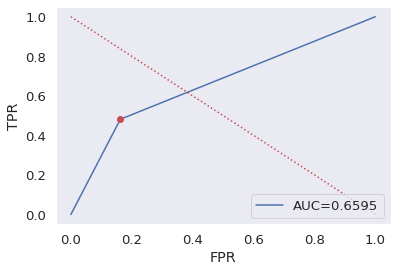

array([1])

In [ ]:
def ROC(y_test,y_pred):
    fpr,tpr,tr=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    idx=np.argwhere(np.diff(np.sign(tpr-(1-fpr)))).flatten()

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot(fpr,tpr,label="AUC="+str(round(auc,4)))
    plt.plot(fpr,1-fpr,'r:')
    plt.plot(fpr[idx],tpr[idx], 'ro')
    plt.legend(loc=4)
    plt.grid()
    plt.show()
    return tr[idx]

ROC(df["y_true"], df["LSTM"])



0.8712606233526735
Threshold value is: 1


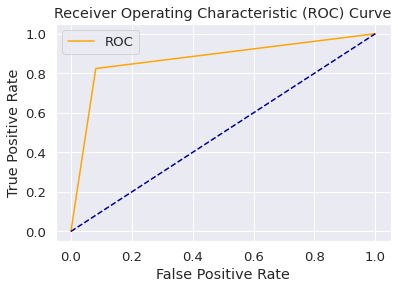

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    #plt.plot(fpr,tpr,label="AUC="+str(round(auc,4)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#y_true = y_test[10:len(aa)]
#y_scores = aa[10:len(aa)]
y_true = df["y_true"]
y_scores = df["Proposed Model"]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

# fix this code



# Code

In [ ]:
class LSTMED():
    def __init__(self, num_epochs: int = 5, batch_size: int = 20, lr: float = 1e-3,
                 hidden_size: int = 5, sequence_length: int = 30, train_gaussian_percentage: float = 0.25,
                 n_layers: int = 1, use_bias: bool = True, dropout: float = 0.2):
        

     

        # set the random seed
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.prediction_details = {}
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.lr = lr
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length
        self.train_gaussian_percentage = train_gaussian_percentage
        self.n_layers = n_layers
        self.use_bias = use_bias
        self.dropout = dropout

        # will be used to store the trained LSTM model
        self.lstmed = None
        # will be used to store the mean and covariance of the Gaussian distribution
        self.mean, self.cov = None, None

    def to_device(self, model):
        '''
        Move the model to the device specified by the user
        :param model: model to move to the device
        '''
        model.to(self.device)

    def fit(self, X: pd.DataFrame):
      
        data = X.values
        # create sequences of data by taking self.sequence_length consecutive rows
        sequences = [data[i:i + self.sequence_length] for i in range(data.shape[0] - self.sequence_length + 1)]
        # shuffle the sequences
        indices = np.random.permutation(len(sequences))
        # split the sequences into a training set and a "train Gaussian" set
        split_point = int(self.train_gaussian_percentage * len(sequences))
        # training set
        train_loader = DataLoader(dataset=sequences, batch_size=self.batch_size, drop_last=True,
                                  sampler=SubsetRandomSampler(indices[:-split_point]), pin_memory=True)
        train_gaussian_loader = DataLoader(dataset=sequences, batch_size=self.batch_size, drop_last=True,
                                           sampler=SubsetRandomSampler(indices[-split_point:]), pin_memory=True)

        # create the LSTM model using the LSTMEDModule class
        self.lstmed = LSTMEDModule(X.shape[1], self.hidden_size,
                                   self.n_layers, self.use_bias, self.dropout)
        # move the model to the device specified by the user
        self.to_device(self.lstmed)
        # create an Adam optimizer
        optimizer = torch.optim.Adam(self.lstmed.parameters(), lr=self.lr)
        # set the model to training mode
        # In PyTorch, the training mode of a model refers to whether the model's parameters are being updated
        # during the forward pass or not. When a model is in training mode, its parameters are being updated
        # based on the gradients computed during the backward pass. When a model is in evaluation mode,
        # its parameters are not updated and certain layers (e.g. dropout layers) may behave differently.
        self.lstmed.train()
        # trange is a wrapper around the range function to provide a smart progress meter
        # when looping over an iterable. It can also be used as a context manager
        for epoch in trange(self.num_epochs):
            # log the epoch number
            logging.debug(f'Epoch {epoch + 1}/{self.num_epochs}.')
            # iterate over the training set
            for ts_batch in train_loader:
                # move the batch to the device specified by the user
                output = self.lstmed(self.to_var(ts_batch))
                # compute the loss between the model's predictions and the actual values using the MSE loss function
                loss = nn.MSELoss(size_average=False)(output, self.to_var(ts_batch.float()))
                # clear the gradients
                self.lstmed.zero_grad()
                # compute the gradients
                loss.backward()
                # update the model's parameters
                optimizer.step()
        # set the model to evaluation mode
        # In PyTorch, the evaluation mode of a model refers to a setting in which the model's parameters
        # are not being updated during the forward pass. In other words, when a model is in evaluation mode,
        # the gradients are not computed during the backward pass and the model's parameters are not updated.
        self.lstmed.eval()
        error_vectors = []
        # iterate over the "train Gaussian" set
        for ts_batch in train_gaussian_loader:
            # forward pass
            output = self.lstmed(self.to_var(ts_batch))
            # compute the error between the model's predictions and the actual values
            error = nn.L1Loss(reduce=False)(output, self.to_var(ts_batch.float()))
            # store the error vectors
            error_vectors += list(error.view(-1, X.shape[1]).data.cpu().numpy())
        # compute the mean and covariance of the error vectors
        self.mean = np.mean(error_vectors, axis=0)
        self.cov = np.cov(error_vectors, rowvar=False)
    
    def to_var(self, t, **kwargs):
     
        # send the tensor to the device
        t = t.to(self.device)
        # convert the tensor to a variable
        return Variable(t, **kwargs)

    def predict(self, X: pd.DataFrame):
      
        data = X.values
        sequences = [data[i:i + self.sequence_length] for i in range(data.shape[0] - self.sequence_length + 1)]
        data_loader = DataLoader(dataset=sequences, batch_size=self.batch_size, shuffle=False, drop_last=False)
        # set the model to evaluation mode
        self.lstmed.eval()
        # create a multivariate normal distribution
        mvnormal = multivariate_normal(self.mean, self.cov, allow_singular=True)
        scores = []
        outputs = []
        errors = []
        # iterate over the data loader
        for idx, ts in enumerate(data_loader):
            # forward pass
            output = self.lstmed(self.to_var(ts))
            # compute the error between the model's predictions and the actual values using the L1 loss function
            # The error is calculated using the L1 loss function because it is a commonly used measure of
            # absolute error between two tensors. The L1 loss function is defined as the sum of the absolute
            # differences between the elements of the two tensors. It is often used because it is more robust
            # to outliers than the mean squared error (MSE) loss, which is another commonly used loss function.
            error = nn.L1Loss(reduce=False)(output, self.to_var(ts.float()))
            # compute the negative log probability of the error under the multivariate normal distribution
            # The scores are calculated using the negative log probability of the error under a multivariate
            # normal distribution because the model is assumed to have a Gaussian distribution of errors.
            # The negative log probability is used as a measure of the likelihood of the error under the
            # assumed distribution. This likelihood can then be used to determine whether a particular sample
            # is an outlier or not, as samples with low likelihood are less likely to have been generated by
            # the model and are more likely to be anomalies.
            score = -mvnormal.logpdf(error.view(-1, X.shape[1]).data.cpu().numpy())
            scores.append(score.reshape(ts.size(0), self.sequence_length))
            outputs.append(output.cpu().data.numpy())
            errors.append(error.cpu().data.numpy())

        # concatenate the scores
        scores = np.concatenate(scores)
        # create a matrix of NaNs with the same shape as the data
        scores_matrix = np.full((self.sequence_length, data.shape[0]), np.nan)
        # iterate over the scores
        for i, score in enumerate(scores):
            # fill the matrix with the scores
            scores_matrix[i % self.sequence_length, i:i + self.sequence_length] = score
        # average the scores over each self.sequence_length consecutive entries
        scores = np.nanmean(scores_matrix, axis=0)

    
        # concatenate the outputs
        outputs = np.concatenate(outputs)
        # create a matrix of NaNs with the same shape as the data
        scores_matrix = np.full((self.sequence_length, X.shape[0], X.shape[1]), np.nan)
        # iterate over the outputs
        for i, output in enumerate(outputs):
            # fill the matrix with the outputs
            scores_matrix[i % self.sequence_length, i:i + self.sequence_length, :] = output
        # average the outputs over each self.sequence_length consecutive entries
        self.prediction_details.update({'reconstructions_mean': np.nanmean(scores_matrix, axis=0).T})
        # concatenate the errors
        errors = np.concatenate(errors)
        # create a matrix of NaNs with the same shape as the data
        scores_matrix = np.full((self.sequence_length, X.shape[0], X.shape[1]), np.nan)
        # iterate over the errors
        for i, error in enumerate(errors):
            # fill the matrix with the errors
            scores_matrix[i % self.sequence_length, i:i + self.sequence_length, :] = error
        # average the errors over each self.sequence_length consecutive entries
        self.prediction_details.update({'errors_mean': np.nanmean(scores_matrix, axis=0).T})
        # return the scores and the prediction details
        return scores, self.prediction_details


class LSTMEDModule(nn.Module):
    def __init__(self, n_features: int, hidden_size: int,
                 n_layers: int, use_bias: bool, dropout: float):
     
        super().__init__()
        # set the device
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.n_features = n_features
        self.hidden_size = hidden_size

        self.n_layers = n_layers
        self.use_bias = use_bias
        self.dropout = dropout
        # encoder
        self.encoder = nn.LSTM(self.n_features, self.hidden_size, batch_first=True,
                               num_layers=self.n_layers, bias=self.use_bias, dropout=self.dropout)
        # send the encoder to the device
        self.to_device(self.encoder)
        # decoder
        self.decoder = nn.LSTM(self.n_features, self.hidden_size, batch_first=True,
                               num_layers=self.n_layers, bias=self.use_bias, dropout=self.dropout)
        # send the decoder to the device
        self.to_device(self.decoder)
        # linear layer
        self.hidden2output = nn.Linear(self.hidden_size, self.n_features)
        # send the linear layer to the device
        self.to_device(self.hidden2output)

    def to_device(self, model):
      
        model.to(self.device)

 

    def to_var(self, t, **kwargs):
       
        # send the tensor to the device
        t = t.to(self.device)
        # convert the tensor to a variable
        return Variable(t, **kwargs)

    def _init_hidden(self, batch_size):
       
        return (self.to_var(torch.Tensor(self.n_layers, batch_size, self.hidden_size).zero_()),
                self.to_var(torch.Tensor(self.n_layers, batch_size, self.hidden_size).zero_()))

    def forward(self, ts_batch):
    
        # get the batch size
        batch_size = ts_batch.shape[0]
        # initialize the hidden state of the encoder
        enc_hidden = self._init_hidden(batch_size)
        # apply the encoder to the input time series data
        _, enc_hidden = self.encoder(ts_batch.float(), enc_hidden)
        # initialize the hidden state of the decoder
        dec_hidden = enc_hidden
        # initialize the output tensor
        output = self.to_var(torch.Tensor(ts_batch.size()).zero_())
        # This means that the model starts at the final time step of the input data and works its way
        # backwards to the initial time step.

        # iterate over the time steps of the input time series data
        for i in reversed(range(ts_batch.shape[1])):
            # apply the linear layer to the current hidden state of the decoder
            output[:, i, :] = self.hidden2output(dec_hidden[0][0, :])
            if self.training:
                # apply the decoder to the input time series data at the current time step
                _, dec_hidden = self.decoder(ts_batch[:, i].unsqueeze(1).float(), dec_hidden)
            else:
                # apply the decoder to the output produced by the model at the current time step
                _, dec_hidden = self.decoder(output[:, i].unsqueeze(1), dec_hidden)

        # return the output of the model
        return output

In [ ]:
import botorch

In [ ]:
import torch
from botorch.fit import fit_gpytorch_model
from botorch.models import SingleTaskGP
from botorch.optim import optimize_acqf
from botorch.acquisition import ExpectedImprovement
from botorch.sampling import SobolQMCNormalSampler
from sklearn.model_selection import cross_val_score

def train_and_evaluate(params):
    num_epochs, batch_size, lr, hidden_size, sequence_length, train_gaussian_percentage, n_layers, use_bias, dropout = params
    model = LSTMED(num_epochs=num_epochs, batch_size=batch_size, lr=lr, hidden_size=hidden_size, sequence_length=sequence_length,
                   train_gaussian_percentage=train_gaussian_percentage, n_layers=n_layers, use_bias=use_bias, dropout=dropout)
    model.fit(X_train, y_train)
    return -np.mean(cross_val_score(model, X_test, y_test, cv=5))

train_X = torch.tensor(X_train.values, dtype=torch.float)
train_Y = torch.tensor(y_train.values, dtype=torch.float)


In [ ]:
train_Y.shape

torch.Size([10000])

In [ ]:
# Define the GP model and fit it to the data

gp = SingleTaskGP(train_X, train_Y)
fit_gpytorch_model(gp)

# Define the acquisition function
ei = ExpectedImprovement(gp, best_f=train_Y.min())

# Define the parameter space
param_space = [Integer(1, 50),
                Integer(10, 100),
                Real(1e-5, 1e-3),
                Integer(5, 50),
                Integer(10, 50),
                Real(0.1, 0.5),
                Integer(1,5),
                Categorical([True, False]),
                Real(0, 0.5)
              ]

# Define the sampler and optimize the acquisition function
sampler = SobolQMCNormalSampler(num_samples=100)
suggested_params, _ = optimize_acqf(acq_function=ei, bounds=param_space, q=1, num_restarts=5, sampler=sampler)

# Train the model with the suggested parameters
best_params = train_and_evaluate(suggested_params)
print("Best hyperparameters: ", best_params)

BotorchTensorDimensionError: ignored